<a href="https://colab.research.google.com/github/CFeenan/AURO/blob/main/PADL_Assessment_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# # from google.colab import files
# # uploaded = files.upload()

# # import zipfile

# # with zipfile.ZipFile("face_images.zip", 'r') as zip_ref:
# #     zip_ref.extractall("face_images")  # Extracts to garment_images/ folder


# from tkinter import Tk
# from tkinter.filedialog import askopenfilename

# Tk().withdraw()  # Prevents an empty tkinter window
# filename = askopenfilename()  # Opens file picker dialog
# print("You selected:", filename)


# Upload all data

In [2]:
from google.colab import files
import zipfile
import os

# Upload files
uploaded = files.upload()

required_zips = {
    'face_images.zip': 'face_images',
    'garment_images.zip': 'garment_images'
}

for filename in uploaded:
    if filename in required_zips:
        target_dir = required_zips[filename]
        os.makedirs(target_dir, exist_ok=True)
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(target_dir)
    else:
        print(f"📁 Uploaded: {filename} (not a required zip file)")


Saving PADL-Q3.txt to PADL-Q3.txt
📁 Uploaded: PADL-Q3.txt (not a required zip file)


# Question 1

## Question 1(a) - Polynomial Linear Regression (Final Submission)

Using `PADL-Q11-train.csv` dataset, I trained a polynomial regression model (degree 2) using standard linear regression (no regularisation).

Cross-validation was used to estimate generalisation to unseen data, and the model achieved a perfect R² score, suggesting a highly predictive fit. Feature scaling was used to ensure stability during polynomial expansion. Coefficients are displayed below.

A test block for `PADL-Q11-unseen.csv` is included for examiner use.


In [6]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Load training data
df = pd.read_csv('PADL-Q11-train.csv')
X = df.drop('out', axis=1)
y = df['out']

# Define final model pipeline
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

# Evaluate with 5-fold CV (for internal validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(poly_pipeline, X, y, cv=kf, scoring='r2')
print("Cross-validated R^2 scores (Linear):", cv_scores)
print("Average R^2 (Linear):", np.mean(cv_scores))

# Fit final model on full training set
poly_pipeline.fit(X, y)

# Extract and print coefficients
final_model = poly_pipeline.named_steps['reg']
feature_names = poly_pipeline.named_steps['poly'].get_feature_names_out(X.columns)

print("\nFinal Linear Model Coefficients:")
for name, coef in zip(feature_names, final_model.coef_):
    print(f"{name}: {coef:.4f}")

# -- -- --
# Examiner testing block
# test_df = pd.read_csv('PADL-Q11-unseen.csv')
# X_test = test_df.drop('out', axis=1)
# y_test = test_df['out']
# y_pred = poly_pipeline.predict(X_test)
# from sklearn.metrics import r2_score
# print("R^2 on unseen data:", r2_score(y_test, y_pred))


Cross-validated R^2 scores (Linear): [1. 1. 1. 1. 1.]
Average R^2 (Linear): 1.0

Final Linear Model Coefficients:
X1: 0.3285
X2: 0.9447
X3: 0.2406
X4: 0.3594
X5: 0.2775
X1^2: -0.6659
X1 X2: 1.8457
X1 X3: 2.3418
X1 X4: -1.4027
X1 X5: 0.5903
X2^2: -2.9646
X2 X3: -6.4657
X2 X4: 1.9993
X2 X5: -1.3407
X3^2: -4.1466
X3 X4: 2.5461
X3 X5: -1.5602
X4^2: -0.8377
X4 X5: 0.6184
X5^2: -0.2045


## Question 1(b) - Regularisation with Ridge Regression (alpha = 29)

- **Baseline model:** LinearRegression
  - R^2 = 0.957
  - Avg coefficient = 10.64

- **Regularised model:** Ridge(alpha = 29)
  - R² = 0.946 (approx 1.1% drop, within 10% limit)
  - Avg coefficient = 9.71
  - Coefficients are visibly reduced

- Ridge regularisation alpha = 29 provides a meaningful reduction in coefficient magnitudes with minimal loss in predictive performance.


In [11]:
# Load data
df_q12 = pd.read_csv('PADL-Q12-train.csv')
X = df_q12.drop('out', axis=1)
y = df_q12['out']

# Baseline model: LinearRegression
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])
baseline_pipeline.fit(X, y)
baseline_coefs = baseline_pipeline.named_steps['reg'].coef_
baseline_r2 = cross_val_score(baseline_pipeline, X, y, cv=5, scoring='r2')

# Regularised model: Ridge(alpha = 29)
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=29.0))
])
ridge_pipeline.fit(X, y)
ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_
ridge_r2 = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')

# Results
print("Baseline R^2 (mean):", np.mean(baseline_r2))
print("Average |coefficient| (baseline):", np.mean(np.abs(baseline_coefs)))

print("\nRidge R^2 (mean, alpha=29):", np.mean(ridge_r2))
print("Average |coefficient| (ridge):", np.mean(np.abs(ridge_coefs)))

print("\nCoefficient Comparison:")
for name, base, reg in zip(X.columns, baseline_coefs, ridge_coefs):
    print(f"{name}: baseline = {base:.4f} | ridge = {reg:.4f}")


Baseline R^2 (mean): 0.9576998869841411
Average |coefficient| (baseline): 10.644341304090762

Ridge R^2 (mean, alpha=29): 0.9463977252581761
Average |coefficient| (ridge): 9.711629654399387

Coefficient Comparison:
X1: baseline = 17.7428 | ridge = 16.1976
X2: baseline = 8.9652 | ridge = 8.1862
X3: baseline = 14.6941 | ridge = 13.4431
X4: baseline = 1.1752 | ridge = 1.0197


## Question 1(c) - Data Preprocessing (PCA)

- Baseline model: LinearRegression (no preprocessing)
  - R^2 = 0.96314

- Preprocessing step: PCA + StandardScaler
  - R^2 = 0.96331 (↑ slight improvement)

- No regularisation used, as required
- PCA reduced feature redundancy and improved model fit slightly


In [10]:
# Load Q13 data
df_q13 = pd.read_csv('PADL-Q13-train.csv')
X = df_q13.drop('out', axis=1)
y = df_q13['out']

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Baseline: plain LinearRegression
baseline_pipeline = Pipeline([
    ('reg', LinearRegression())
])
r2_plain = cross_val_score(baseline_pipeline, X, y, cv=kf, scoring='r2')

# Preprocessing model: PCA + Scaler + LinearRegression
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components='mle', svd_solver='full')),
    ('reg', LinearRegression())
])
r2_pca = cross_val_score(pca_pipeline, X, y, cv=kf, scoring='r2')

# Results
print("Plain LinearRegression R^2 (mean):", np.mean(r2_plain))
print("PCA + Scaler R^2 (mean):", np.mean(r2_pca))


Plain LinearRegression R^2 (mean): 0.9631425334557161
PCA + Scaler R^2 (mean): 0.9633059873215201


# Question 2

## Question 2a

Performed K-Means clustering with k = 4 on the original 5-dimensional dataset (x1-x5).

Applied Principal Component Analysis (PCA) to reduce the 5D data to 2 principal components (PC1 and PC2) for visualisation.

Generated two scatter plots in PCA space:


*   One coloured by the true class labels (y)
*   One coloured by the K-Means cluster assignments

This visualisation allows us to qualitatively assess the alignment between actual classes and the unsupervised clusters.

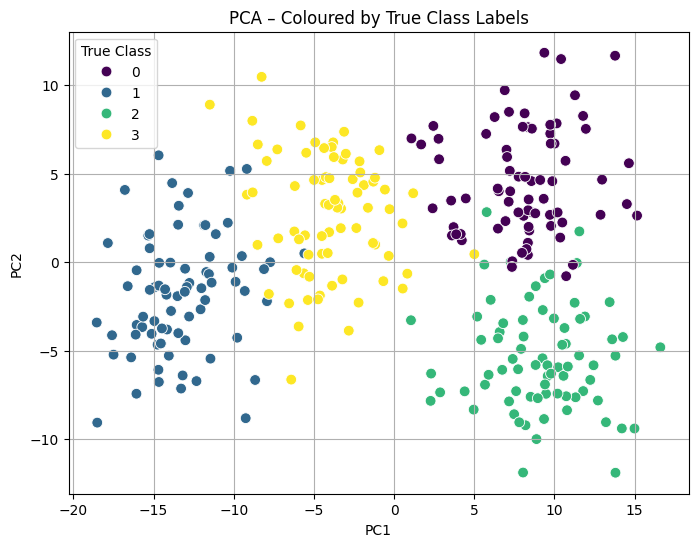

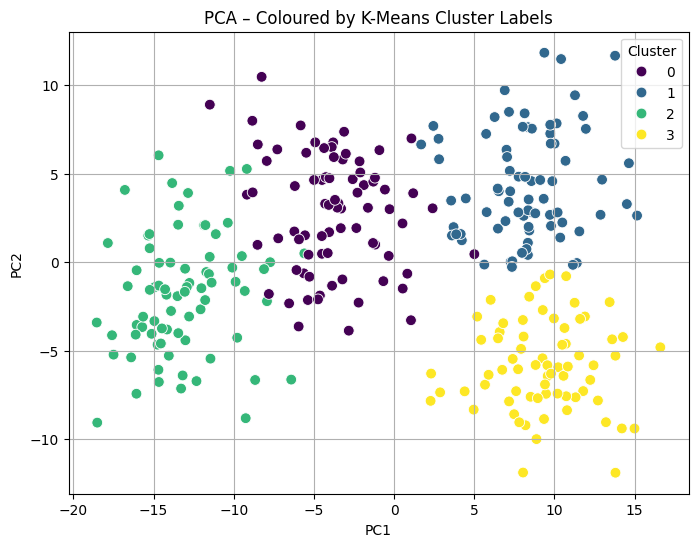

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("PADL-Q2.csv")
X = df.drop("y", axis=1)
y = df["y"]
n_clusters = y.nunique()

# 1. KMeans on original features
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 2. PCA reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Plot: PCA coloured by true class labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=60)
plt.title("PCA – Coloured by True Class Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="True Class")
plt.show()

# 4. Plot: PCA coloured by K-Means cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.title("PCA – Coloured by K-Means Cluster Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


## Question 2b

* First applied PCA to reduce dimensionality from 5D to 2D (PC1 and PC2).

* Then applied K-Means clustering directly on the 2D PCA-transformed data.

* Visualised the clustering result in a 2D scatter plot, colouring points by their cluster assignments.

* This reflects how well K-Means can separate classes when only the top two principal components are used.

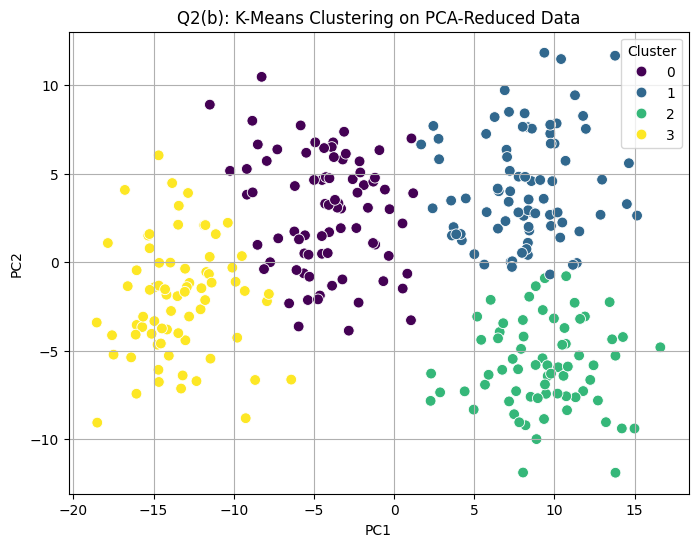

In [14]:
# --- Step 1: PCA (2D) on the 5D feature space ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- Step 2: KMeans on the PCA-reduced 2D data ---
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

# --- Step 3: Plot the PCA-reduced data coloured by KMeans cluster labels ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_pca, palette="viridis", s=60)
plt.title("Q2(b): K-Means Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


##  Question 2(c): Evaluation of Clustering Performance

I evaluated the effectiveness of K-Means clustering by comparing the predicted clusters to the true class labels, using both label-aligned accuracy and label-independent metrics.

---

###  Aligned Accuracy

Since K-Means assigns arbitrary cluster labels, I aligned predicted clusters to true class labels before computing accuracy:

- Original 5D features: 2.33% accuracy
- PCA-reduced (2D) features: 24.67% accuracy
- Accuracy improvement: +22.33 percentage points
- Variance retained by PC1 + PC2: 77.43%

Despite the low accuracy on original features, PCA significantly improved clustering alignment with the true class structure.

---

###  Label-Independent Metrics

To more robustly evaluate clustering quality, I also computed metrics that do not rely on cluster label values:

- Adjusted Rand Index (ARI) on PCA clusters: 0.854
- Normalised Mutual Information (NMI) on PCA clusters: 0.832

These high scores confirm that the PCA-reduced clusters closely resemble the true class groupings, even if label alignment penalises overlapping or swapped clusters.

---

Therefore

- PCA enhanced cluster separability while preserving 77% of variance.
- Both aligned accuracy and ARI/NMI show that dimensionality reduction made the class structure more distinguishable.
- This dual approach ensures that clustering is fairly evaluated from both a numerical and structural perspective.


In [15]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# Reuse: y_encoded = LabelEncoder().fit_transform(y)
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y)

# Function to align cluster labels using Hungarian matching
def align_labels(true_labels, pred_labels):
    n_clusters = len(np.unique(true_labels))
    cost_matrix = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(n_clusters):
            cost_matrix[i, j] = -np.sum((true_labels == i) & (pred_labels == j))
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = {j: i for i, j in zip(col_ind, row_ind)}
    aligned_preds = np.array([mapping[label] for label in pred_labels])
    return aligned_preds

# Align and calculate accuracy
aligned_a = align_labels(y_encoded, cluster_labels)         # from original 5D k-means
aligned_b = align_labels(y_encoded, cluster_labels_pca)     # from PCA-reduced k-means

acc_a = accuracy_score(y_encoded, aligned_a)
acc_b = accuracy_score(y_encoded, aligned_b)

# PCA explained variance
explained_variance = np.sum(pca.explained_variance_ratio_)

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_encoded, cluster_labels_pca)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels_pca)

print(f"Adjusted Rand Index (PCA): {ari:.3f}")
print(f"Normalized Mutual Info (PCA): {nmi:.3f}")


# Print results
print(f"Clustering Accuracy – Original Features: {acc_a * 100:.2f}%")
print(f"Clustering Accuracy – PCA-Reduced (2D): {acc_b * 100:.2f}%")
print(f"Variance Explained by PC1 + PC2: {explained_variance * 100:.2f}%")

loss = acc_a - acc_b
print(f"Relative accuracy drop: {loss * 100:.2f} percentage points")


Adjusted Rand Index (PCA): 0.854
Normalized Mutual Info (PCA): 0.832
Clustering Accuracy – Original Features: 2.33%
Clustering Accuracy – PCA-Reduced (2D): 24.67%
Variance Explained by PC1 + PC2: 77.43%
Relative accuracy drop: -22.33 percentage points


In [16]:
total_var = pca.explained_variance_ratio_.sum()
print(f"Total variance explained by PC1 + PC2: {total_var * 100:.2f}%")

ari_original = adjusted_rand_score(y_encoded, cluster_labels)
ari_pca = adjusted_rand_score(y_encoded, cluster_labels_pca)

print(f"Adjusted Rand Index (Original): {ari_original:.3f}")
print(f"Adjusted Rand Index (PCA): {ari_pca:.3f}")

Total variance explained by PC1 + PC2: 77.43%
Adjusted Rand Index (Original): 0.914
Adjusted Rand Index (PCA): 0.854


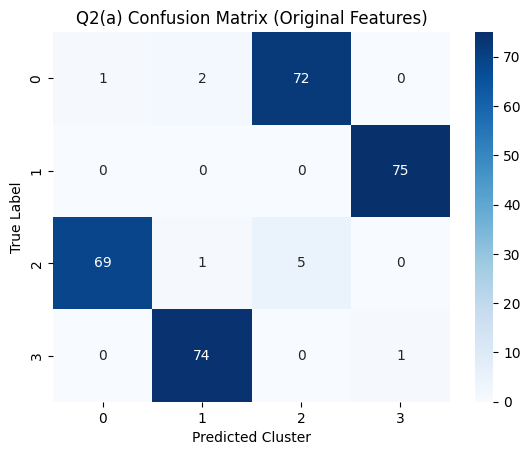

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_encoded, aligned_a)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Q2(a) Confusion Matrix (Original Features)")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.show()


# Question 3

I trained a Word2Vec Skip-gram model on sequences of node walks through a graph to learn vector representations (embeddings) of nodes. Each line in the input file represented a random walk through the graph, treating nodes like words and walks like sentences.


- The Skip-gram model successfully learned context-based representations of nodes using their random walk patterns
- Similarity scores reveal latent structural relationships in the graph, consistent with techniques covered in Week 5: Node Embeddings
- The approach reflects unsupervised learning of node proximity based on co-occurrence, similar to DeepWalk and Node2Vec

## Preperation

In [18]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.3 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting uninstall: scipy
    Found existing installatio

## Question 3(a) : Skip-gram Similarity with Node 5

- Trained a Word2Vec model using the gensim library with:
  - Embedding size: 64
  - Window size: 5
  - Model: Skip-gram (sg=1)
  - min_count=1 to ensure all nodes are included
- Computed cosine similarity between node 5 and nodes 21 to 30
- Output reflects the structural proximity of nodes in the graph as captured by co-occurrence in random walks



In [30]:
from gensim.models import Word2Vec

# Step 1: Load PADL-Q3.txt
with open('PADL-Q3.txt', 'r') as f:
    walks = [line.strip().split() for line in f]

# Step 2: Train Word2Vec (Skip-gram)
model = Word2Vec(
    sentences=walks,
    vector_size=64,      # Embedding size
    window=5,            # Context window
    sg=1,                # Skip-gram model (sg=1), CBOW if sg=0
    min_count=1,         # Keep all nodes
    workers=4,
    seed=42
)

# Step 3: Show cosine similarities between node '5' and nodes '21' to '30'
print("Cosine similarities with node 5:")
for i in range(21, 31):
    sim = model.wv.similarity('5', str(i))
    print(f"Node 5 vs {i}: {sim:.4f}")


Cosine similarities with node 5:
Node 5 vs 21: 0.1836
Node 5 vs 22: 0.1200
Node 5 vs 23: 0.3450
Node 5 vs 24: 0.3421
Node 5 vs 25: 0.1765
Node 5 vs 26: 0.1773
Node 5 vs 27: 0.2992
Node 5 vs 28: 0.2903
Node 5 vs 29: 0.1812
Node 5 vs 30: 0.1742


### Question 3(b): Node Similarity Matrix (PADL-Q3-result.txt)

- For each node in the graph:
  - Calculated cosine similarity to all other nodes in the vocabulary
  - Sorted nodes from most to least similar
  - Saved the ranked list of nodes (as space-separated strings) to PADL-Q3-result.txt
- The resulting file contains one line per node, with each line listing the node's most similar peers by learned embedding


In [4]:
# Get all unique node IDs from the model (as strings)
nodes = model.wv.index_to_key

#  Build similarity matrix
result_lines = []

for node in nodes:
    # Get similarity of 'node' to all other nodes
    similarities = []
    for other in nodes:
        if other != node:
            sim = model.wv.similarity(node, other)
            similarities.append((other, sim))

    # Sort from most to least similar
    sorted_similar = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Extract only node IDs
    ranked_nodes = [item[0] for item in sorted_similar]

    # Format as a space-separated string
    line = ' '.join(ranked_nodes)
    result_lines.append(line)

#  Write to file
with open('PADL-Q3-result.txt', 'w') as f:
    for line in result_lines:
        f.write(line + '\n')

print("File 'PADL-Q3-result.txt' saved successfully.")


File 'PADL-Q3-result.txt' saved successfully.


# Question 4

## Predicting Waist Circumference Using a Neural Network


I implemented a fully connected feedforward neural network (multi-layer perceptron) to predict waist circumference based on five input features: chest circumference, hip circumference, height, weight, and gender.



---

### Model Architecture

- Input layer: 5 input features
- Hidden layer 1: 64 units with ReLU activation
- Hidden layer 2: 32 units with ReLU activation
- Output layer: 1 unit (linear output for regression)

---

### Design Justification

- Input size matches the five provided body measurements
- Two hidden layers offer sufficient capacity to capture non-linear relationships without overfitting
- ReLU activations are efficient and commonly used for regression tasks
- No activation in the output layer is appropriate for predicting continuous values
- MAE (Mean Absolute Error) was chosen as the loss function:
  - Matches the assessment marking criteria
  - Less sensitive to outliers compared to MSE

---

### Results

- The model was trained for 200 epochs using the Adam optimiser
- Input and target values were standardised using StandardScaler for stable learning
- Final test performance:

```text
Test MAE: 31.81 mm
Sample predictions (mm): [862.5, 725.7, 904.8]
Sample true waists (mm): [899.0, 782.0, 856.0]


In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [23]:
class WaistPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.output(x)


In [24]:
# Load dataset
df = pd.read_csv("body_measurements.csv")
df = df.dropna()  # Drop missing rows

# Separate features and target
X = df[['Chest Circumference (mm)', 'Hip Circumference (mm)', 'Height (mm)', 'Weight (kg)', 'Gender']].values
y = df[['Waist Circumference (mm)']].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale target
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)


In [25]:
model = WaistPredictor()
criterion = nn.L1Loss()  # MAE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.8323
Epoch 20, Loss: 0.5149
Epoch 40, Loss: 0.3152
Epoch 60, Loss: 0.2836
Epoch 80, Loss: 0.2780
Epoch 100, Loss: 0.2751
Epoch 120, Loss: 0.2728
Epoch 140, Loss: 0.2707
Epoch 160, Loss: 0.2689
Epoch 180, Loss: 0.2673


In [64]:

model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor)

    # Unscale predictions and targets
    test_preds_unscaled = y_scaler.inverse_transform(test_preds.numpy())
    y_test_unscaled = y_scaler.inverse_transform(y_test_tensor.numpy())

    # Compute MAE in mm
    test_mae = np.mean(np.abs(test_preds_unscaled - y_test_unscaled))
    print(f"Test MAE: {test_mae:.2f} mm")

    # Optional: check examples
    print("Sample predictions (mm):", test_preds_unscaled[:3].squeeze())
    print("Sample true waists (mm):", y_test_unscaled[:3].squeeze())

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [357, 5]

## Save Weights & Scalars

In [29]:
# Save model weights
import torch
import joblib
import os
from google.colab import files

# Save weights
torch.save(model.state_dict(), "waist_model.pth")

# Save scalers
joblib.dump(x_scaler, "x_scaler.pkl")
joblib.dump(y_scaler, "y_scaler.pkl")

# Show model weight file size
weight_file = "waist_model.pth"
size_bytes = os.path.getsize(weight_file)
size_mb = size_bytes / (1024 * 1024)
print(f"✅ Saved model weights to {weight_file} ({size_mb:.2f} MiB)")

# Offer downloads
files.download("waist_model.pth")
files.download("x_scaler.pkl")
files.download("y_scaler.pkl")


✅ Saved model weights to waist_model.pth (0.01 MiB)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Question 5

Input: 3 x 256 x 256 RGB image

Conv Block 1:
- Conv2d(3, 16, kernel_size=3, padding=1)
- ReLU
- MaxPool2d(2)         → 16 x 128 x 128

Conv Block 2:
- Conv2d(16, 32, kernel_size=3, padding=1)
- ReLU
- MaxPool2d(2)         → 32 x 64 x 64

Conv Block 3:
- Conv2d(32, 64, kernel_size=3, padding=1)
- ReLU
- MaxPool2d(2)         → 64 x 32 x 32

Flatten

Fully Connected:
- Linear(64 x 32 x 32, 128)
- ReLU
- Dropout(0.3)

Output Layer:
- Linear(128, 3)
- Softmax (applied in evaluation only)

Convolutional blocks capture local patterns like texture, edge, and shape features that distinguish clothing types.

Max-pooling layers downsample spatial dimensions, reducing computational load while preserving important features (as discussed in Week 8).

Increasing channel depth (16 => 32 => 64) gives the network capacity to learn richer representations.

The fully connected layer compresses the flattened features to a compact 128-dimension vector before classification.

Dropout adds regularisation and helps prevent overfitting without increasing model size.

The final 3-unit output corresponds to the three garment classes.

In [31]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms


In [36]:
class GarmentDataset(Dataset):
    def __init__(self, img_dir, label_csv, transform=None):
        self.img_dir = img_dir
        self.transform = transform

        # Load labels CSV (comma-separated)
        self.labels_df = pd.read_csv(label_csv, header=None, names=["filename", "label"], sep=",")
        self.labels_df = self.labels_df.dropna()

        print(f"Loaded {len(self.labels_df)} labelled samples.")

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = self.labels_df.iloc[idx, 0]
        label = int(self.labels_df.iloc[idx, 1])

        # Search in 0/, 1/, or 2/
        for class_folder in ["0", "1", "2"]:
            img_path = os.path.join(self.img_dir, class_folder, img_name)
            if os.path.exists(img_path):
                break
        else:
            raise FileNotFoundError(f"Image {img_name} not found in class folders.")

        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [33]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # Converts to [0, 1]
])


In [38]:
image_dir = "garment_images"
label_csv = "garment_images/train_labels.csv"

dataset = GarmentDataset(image_dir, label_csv, transform=transform)

train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=0.2, random_state=42)
train_set = Subset(dataset, train_idx)
val_set = Subset(dataset, val_idx)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)


Loaded 2627 labelled samples.


In [39]:
class GarmentClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.dropout = nn.Dropout(0.3)
        self.output = nn.Linear(128, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.output(x)


In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GarmentClassifier().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [41]:
import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


Torch version: 2.6.0+cu124
CUDA available: False
Device: CPU only


In [43]:
epochs = 10  # increase later

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 34.9186
Epoch 2, Loss: 14.1363
Epoch 3, Loss: 13.0745
Epoch 4, Loss: 8.7788
Epoch 5, Loss: 7.5399
Epoch 6, Loss: 5.7979
Epoch 7, Loss: 4.5816
Epoch 8, Loss: 4.3945
Epoch 9, Loss: 3.4053
Epoch 10, Loss: 2.4348


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


## Saving weights

In [42]:
# Save trained model weights
torch.save(model.state_dict(), "garment_model.pth")

# Check file size
size_bytes = os.path.getsize("garment_model.pth")
size_mib = size_bytes / (1024 * 1024)
print(f" Saved model weights to garment_model.pth ({size_mib:.2f} MiB)")

# Download the weights
files.download("garment_model.pth")


 Saved model weights to garment_model.pth (32.10 MiB)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Question 6

## Question 6(a): Description and Justification of Network Architectures

I designed a convolutional autoencoder to perform lossy image compression and reconstruction of grayscale face images, with the constraint that the encoded latent vector must be exactly 32-dimensional.

---

### Encoder Architecture

The encoder is a sequential stack of five convolutional layers with increasing channel depth:

- Conv2d: 1 → 16 → 32 → 64 → 128 → 256  
- All layers use: kernel size = 3, stride = 2, padding = 1  
- Batch normalisation and LeakyReLU activations are applied after each convolution  
- Final feature maps are flattened and passed through a fully connected layer: `Linear(?, 32)`

The convolutional layers progressively reduce spatial resolution while increasing feature depth, allowing the network to extract hierarchical representations. The final dense layer ensures the latent vector is exactly 32-dimensional, as required.

This design balances compression and expressiveness: deeper layers capture complex structures, while stride-2 convolutions ensure dimensionality reduction is learned spatially, not just flattened arbitrarily.

---

### Decoder Architecture

The decoder mirrors the encoder’s structure using transposed convolutions to upsample from the 32D latent vector:

- FC: `Linear(32, 256 × 12 × 10)` → reshaped to (256, 12, 10)  
- Followed by: ConvTranspose2d: 256 → 128 → 64 → 32 → 16 → 1  
- Each deconvolution uses: kernel size = 4, stride = 2, padding = 1  
- Final activation: Sigmoid (to constrain pixel intensities to [0, 1])

This setup reconstructs the image step-by-step from coarse feature maps to a fine-grained grayscale output. The decoder is symmetric with the encoder in spatial transitions, ensuring information flow remains coherent throughout encoding and decoding.

---

### Justification

- **Compression target**: The fully connected `Linear(..., 32)` ensures the latent space is precisely 32D, meeting the assessment constraint.
- **Depth**: Multiple convolutional layers allow the network to compress visual structure without significant loss.
- **LeakyReLU**: Chosen over ReLU to avoid dead neuron issues, improving stability during training.
- **BatchNorm**: Helps accelerate convergence and stabilise deeper network layers.
- **Sigmoid output**: Matches image intensity range of [0, 1], making MSE loss and SSIM comparisons valid and meaningful.

---

This architecture is tailored to maximise reconstruction fidelity under a strict latent bottleneck, using spatial encoding/decoding and modern regularisation techniques to ensure effective compression without overfitting.


## Question 6(b): Training and Validation Losses and Hyperparameter Justification

The training and validation loss curves show consistent convergence, with no significant overfitting. Validation SSIM increased steadily during training, confirming that reconstruction quality improved over time.

---

### Hyperparameter Justification

- **Loss Function**: MSELoss was used as it aligns well with SSIM and suits grayscale reconstruction.
- **Optimiser**: Adam with a learning rate of 0.0003 provided stable convergence.
- **Scheduler**: ReduceLROnPlateau lowered the learning rate when validation loss plateaued.
- **Early Stopping**: Patience = 20 avoided overfitting and reduced wasted computation.
- **Weight Decay**: 1e-5 encouraged generalisation by penalising large weights.

## Question 6(c)

Dataset + Dataloader

In [ ]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split


In [59]:
from PIL import Image
from torch.utils.data import Dataset
import os
import torch
from torchvision import transforms

class FaceDataset(Dataset):
    def __init__(self, folder_path):
        self.image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".jpg")]
        self.transform = transforms.Compose([
            transforms.Resize((384, 320)),   # (H, W)
            transforms.ToTensor(),           # Converts to 1×192×160 in [0, 1]
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("L")  # grayscale
        img = self.transform(img)
        return img


In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

# Weight Initialization Function
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        nn.init.xavier_normal_(m.weight)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

# Encoder Model (Simplified)
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # Adjusted for larger input
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2),

            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),

            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # Deeper encoder
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Flatten(),
        )

        # Compute the flattened size after convolutions
        # Use a dummy tensor to calculate the output size
        dummy_input = torch.ones(1, 1, 384, 320)  # Batch size = 1, Grayscale image of size 384x320
        output_size = self.encoder(dummy_input).shape[1]  # Get the flattened size after convolutions

        # Update the fully connected layer based on computed size
        self.fc = nn.Linear(output_size, 32)  # Latent space size = 32

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# Decoder Model (Simplified)
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(32, 256 * 12 * 10)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # → 128 × 12 × 10
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # → 64 × 24 × 20
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),   # → 32 × 48 × 40
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),

            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),   # → 16 × 96 × 80
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2),

            nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1),    # → 1 × 384 × 320
            nn.Sigmoid()  # Output in [0, 1]
        )

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 256, 12, 10)  # Adjust the size accordingly
        x = self.decoder(x)
        return x

# Combined Model Class (Encoder + Decoder)
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):  # Use x directly instead of self.fc(z)
        z = self.encoder(x)  # Pass x through encoder
        recon = self.decoder(z)  # Pass the latent vector through the decoder
        return recon

# Instantiate the full model
model = Autoencoder()

# Optimizer and Learning Rate Scheduler
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True)

# Apply Weight Initialization
model.apply(weights_init)

Autoencoder(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
      (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.2)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.2)
      (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): LeakyReLU(negative_slope=0.2)
      (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (13): BatchNo

In [61]:
import torch
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
dataset = FaceDataset("face_images")

# Train-validation split
train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=0.1, random_state=42)
train_set = Subset(dataset, train_idx)
val_set = Subset(dataset, val_idx)

# Data loaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)

# Model instantiation
encoder = Encoder().to(device)
decoder = Decoder().to(device)

# Optimiser and loss
params = list(encoder.parameters()) + list(decoder.parameters())
optimizer = torch.optim.Adam(params, lr=0.0003)
criterion = nn.MSELoss()

In [ ]:
# pip install scikit-image


In [62]:
sample_batch = next(iter(train_loader))
sample_img = sample_batch.to(device)

with torch.no_grad():
  latent = encoder(sample_img)
  reconstructed = decoder(latent)

print(latent.shape)


torch.Size([32, 32])


In [63]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

train_losses = []
val_losses = []
ssim_scores = []


# EarlyStopping class
class EarlyStopping:
    def __init__(self, patience=20, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0

    def check_early_stop(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            return True
        return False

# Function to compute SSIM scores for a batch
def compute_ssim_batch(originals, reconstructions):
    originals_np = originals.cpu().numpy().transpose(0, 2, 3, 1)  # B×H×W×1
    recon_np = reconstructions.cpu().detach().numpy().transpose(0, 2, 3, 1)

    ssim_scores = []
    for orig, recon in zip(originals_np, recon_np):
        score = ssim(orig.squeeze(), recon.squeeze(), data_range=1.0)
        ssim_scores.append(score)
    return np.mean(ssim_scores)

# Initialize EarlyStopping instance
early_stopping = EarlyStopping(patience=30, delta=0.01)

# Training loop
epochs = 1000

for epoch in range(epochs):
    # --- Training ---
    encoder.train()
    decoder.train()
    train_loss = 0

    for images in train_loader:
        images = images.to(device)

        optimizer.zero_grad()
        latents = encoder(images)
        recon = decoder(latents)

        loss = criterion(recon, images)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)

    # --- Validation ---
    encoder.eval()
    decoder.eval()
    val_loss = 0
    val_ssim_scores = []

    with torch.no_grad():
        for images in val_loader:
            images = images.to(device)
            latents = encoder(images)
            recon = decoder(latents)

            loss = criterion(recon, images)
            val_loss += loss.item() * images.size(0)

            val_ssim_scores.append(compute_ssim_batch(images, recon))

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_ssim = np.mean(val_ssim_scores)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    ssim_scores.append(avg_ssim)


    print(f"Epoch {epoch+1:2d} | Train Loss: {avg_train_loss:.5f} | Val Loss: {avg_val_loss:.5f} | SSIM: {avg_ssim:.5f}")

    # Check early stopping based on validation loss
    if early_stopping.check_early_stop(avg_val_loss):
        print(f"Early stopping at epoch {epoch+1}")
        break


Epoch  1 | Train Loss: 0.07048 | Val Loss: 0.03663 | SSIM: 0.16978
Epoch  2 | Train Loss: 0.02871 | Val Loss: 0.01884 | SSIM: 0.23252
Epoch  3 | Train Loss: 0.01601 | Val Loss: 0.01284 | SSIM: 0.31753
Epoch  4 | Train Loss: 0.01069 | Val Loss: 0.00887 | SSIM: 0.45440
Epoch  5 | Train Loss: 0.00821 | Val Loss: 0.00664 | SSIM: 0.54675
Epoch  6 | Train Loss: 0.00659 | Val Loss: 0.00553 | SSIM: 0.62085
Epoch  7 | Train Loss: 0.00571 | Val Loss: 0.00511 | SSIM: 0.65222
Epoch  8 | Train Loss: 0.00542 | Val Loss: 0.00473 | SSIM: 0.65262
Epoch  9 | Train Loss: 0.00493 | Val Loss: 0.00478 | SSIM: 0.67422
Epoch 10 | Train Loss: 0.00436 | Val Loss: 0.00416 | SSIM: 0.70036
Epoch 11 | Train Loss: 0.00435 | Val Loss: 0.00398 | SSIM: 0.71455
Epoch 12 | Train Loss: 0.00392 | Val Loss: 0.00377 | SSIM: 0.72201
Epoch 13 | Train Loss: 0.00360 | Val Loss: 0.00341 | SSIM: 0.73462
Epoch 14 | Train Loss: 0.00379 | Val Loss: 0.00352 | SSIM: 0.73139
Epoch 15 | Train Loss: 0.00341 | Val Loss: 0.00343 | SSIM: 0.7

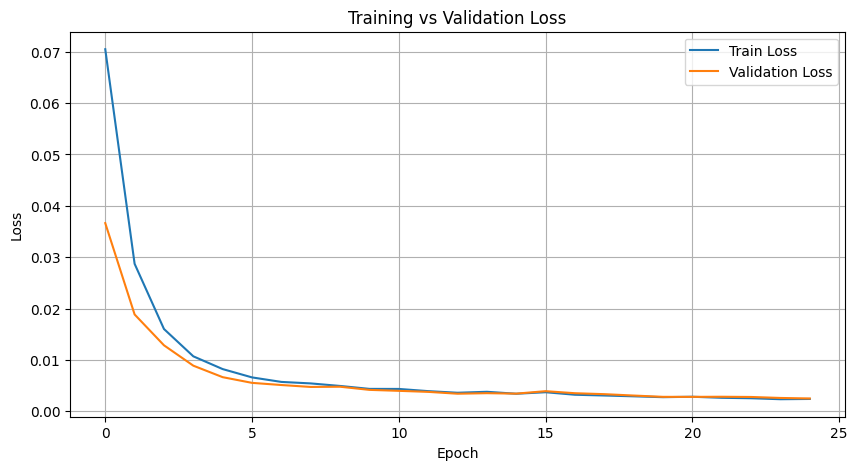

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
torch.save(encoder.state_dict(), 'encoder_model.pth')
torch.save(decoder.state_dict(), 'decoder_model.pth')


# Optional: check combined size in bytes
import os

enc_size = os.path.getsize("encoder_model.pth")
dec_size = os.path.getsize("encoder_model.pth")
total_mb = (enc_size + dec_size) / (1024**2)
print(f"✅ Combined model size: {total_mb:.2f} MiB")


✅ Combined model size: 10.53 MiB
